In [1]:
# imports

import pandas as pd
import matplotlib.pyplot as plt

from scripts.predictor import Predictor, ShingleScore
from scripts.text_preprocessor import TextPreprocessor

In [2]:
# Utils for plotting graph

def plot(p, draw):
    p.figure()
    draw()
    p.show()

In [3]:
# Some constants
input_file = 'tmp/mapred-filtered-100.csv'

In [4]:
# Create a list of predictors

predictors = [Predictor(ignore_warnings=True)]
for shingle_len in range(1, 6):
    predictors.append(Predictor(shingle_len_filter=shingle_len, 
                                ignore_warnings=True))

In [5]:
# Load database

db = pd.read_csv(input_file)
db.sample(n=10)

,score,k,frequency,shingle
1376,3,4,23,food freshly openedpi likes
192,1,2,238,br tried
555,2,1,1601,say
1320,3,4,27,coffeetea love organic coffee
990,2,5,19,raspberry tea tastes like just
1415,3,5,23,beef daybrownie prefers dry food
1892,4,4,34,erratic work schedule trying
2159,5,2,1756,feel like
364,1,4,124,crying got food split
1604,4,2,1449,taste like


In [6]:
# Add shingle scores

for idx, r in db.iterrows():
    shingle_score = ShingleScore(shingle=str(r['shingle']),
                                 score=r['score'],
                                 frequency=r['frequency'])
    for pdtr in predictors:
        pdtr.addShingleScore(shingle_score)

In [7]:
# Load test data

td = pd.read_csv('tmp/processed-70.csv')
td.sample(n=10)

,Score,Text
33437,4,really like kays sweet bbq snack mix serving s...
217366,3,like cerelacs europe cerelac mixed properly fo...
285768,5,quite surprised mild flavor supermarket caviar...
110349,4,best brand boxed gf mac cheese buy time tried ...
81,5,good cocoajust got keurig christmas tell enjoy...
373689,4,initially flower order placed seemingly differ...
135736,5,wonderful combination flavors proves heaven tr...
126299,5,good bought store try loved bought case online...
3870,5,peanut bars best 50s great energy booster used...
208155,5,okay bought craving fish curry like mum used m...


In [8]:
# Preprocess the test data

tp = TextPreprocessor()
td['Processed Text'] = td['Text'].apply(lambda t: tp.process(t))
td.sample(n=10)

,Score,Text,Processed Text
75896,5,im happy able health food stores carry itmy hu...,im happy able health food stores carry itmy hu...
38926,4,glad access hard product local stores bit pric...,glad access hard product local stores bit pric...
63,5,hot sauce thicker hot sauces not particularly ...,hot sauce thicker hot sauces not particularly ...
212373,3,im not sure acai powder supposed exactly id he...,im not sure acai powder supposed exactly id he...
142690,5,great productlove ability pantry know drinking...,great productlove ability pantry know drinking...
70128,5,really enjoyed mixvery tasty breadthe baking m...,really enjoyed mixvery tasty breadthe baking m...
285575,5,loves foodlicks bowl cleani think quality prod...,loves foodlicks bowl cleani think quality prod...
263373,5,husband loves muffinsi tried flavors likes bes...,husband loves muffinsi tried flavors likes bes...
270599,5,received item quicklyalthough havent used exci...,received item quicklyalthough havent used exci...
74247,5,not good deal great variety coffee flavorsyou ...,not good deal great variety coffee flavorsyou ...


In [9]:
# Test the predictors

for idx, pdtr in enumerate(predictors):
    print('Testing Predictor {}...'.format(idx))
    td['Predictor {} Score'.format(idx)] = td['Processed Text'].apply(lambda t: pdtr.predict(t))

Testing Predictor 0...
Testing Predictor 1...
Testing Predictor 2...
Testing Predictor 3...
Testing Predictor 4...
Testing Predictor 5...


In [10]:
td.sample(n=10)

,Score,Text,Processed Text,Predictor 0 Score,Predictor 1 Score,Predictor 2 Score,Predictor 3 Score,Predictor 4 Score,Predictor 5 Score
1337,4,kettle brand potato chips spicy thai flavor re...,kettle brand potato chips spicy thai flavor re...,3.734073,3.966713,3.718249,3.517257,3.0,3.0
85389,3,love lipton iced tea shocked say price boxamaz...,love lipton iced tea shocked say price boxamaz...,4.050611,4.044149,4.057074,3.000000,3.0,3.0
367827,4,glass jar chow watmore ken talk pink salt resi...,glass jar chow watmore ken talk pink salt resi...,3.000000,3.000000,3.000000,3.000000,3.0,3.0
245142,4,unable canned pumpkin grocery stores pumpkin s...,unable canned pumpkin grocery stores pumpkin s...,4.214879,3.994624,4.435133,3.000000,3.0,3.0
355909,5,family just loves having novasliced salmon goo...,family just loves having novasliced salmon goo...,4.183532,4.183532,3.000000,3.000000,3.0,3.0
292506,5,really nice surprise far taste goes not spicy ...,really nice surprise far taste goes not spicy ...,4.482574,4.073318,4.891830,3.000000,3.0,3.0
272329,5,brand buy grocery store amazon brings better p...,brand buy grocery store amazon brings better p...,4.206800,4.124537,4.289062,3.000000,3.0,3.0
221222,5,far best gluten free waffle pancake mix ive fo...,far best gluten free waffle pancake mix ive fo...,4.655346,4.425861,4.540178,5.000000,3.0,3.0
68424,5,drink decaf drink coffee night ive settled bes...,drink decaf drink coffee night ive settled bes...,4.011191,4.082566,3.939817,3.000000,3.0,3.0
60114,5,hesitate buy product just previous experience ...,hesitate buy product just previous experience ...,3.443696,3.908199,3.422891,3.000000,3.0,3.0


In [11]:
tdd = td.drop(['Text', 'Processed Text'], axis=1)
tdd.sample(n=10)

,Score,Predictor 0 Score,Predictor 1 Score,Predictor 2 Score,Predictor 3 Score,Predictor 4 Score,Predictor 5 Score
257359,5,4.267970,4.267970,3.000000,3.000000,3.0,3.0
171898,4,4.251052,3.943066,4.111627,4.698462,3.0,3.0
174439,5,3.929015,3.929015,3.000000,3.000000,3.0,3.0
106071,5,3.032660,4.065319,2.000000,3.000000,3.0,3.0
395148,1,3.736927,3.932451,3.541402,3.000000,3.0,3.0
374397,1,2.347128,4.041383,1.000000,2.000000,3.0,3.0
253968,4,4.235921,4.133633,4.338208,3.000000,3.0,3.0
351557,2,3.882290,4.056102,3.791472,3.799296,3.0,3.0
274971,5,4.173566,4.173566,3.000000,3.000000,3.0,3.0
328949,5,2.709227,4.127681,3.000000,1.000000,3.0,3.0


In [12]:
for idx in range(6):
    from_column = 'Predictor {} Score'.format(idx)
    to_column = 'Predictor {} Score Error'.format(idx)
    tdd[to_column] = tdd[from_column] - tdd['Score']
    tdd = tdd.drop([from_column], axis=1)

tdd.sample(n=10)

,Score,Predictor 0 Score Error,Predictor 1 Score Error,Predictor 2 Score Error,Predictor 3 Score Error,Predictor 4 Score Error,Predictor 5 Score Error
118602,5,-0.977049,-0.977049,-2.000000e+00,-2.000000e+00,-2.000000e+00,-2.000000e+00
80814,5,-0.385629,-0.952313,-5.902017e-01,0.000000e+00,0.000000e+00,-2.000000e+00
37918,5,-0.842983,-0.808507,-8.774584e-01,-2.000000e+00,-2.000000e+00,-2.000000e+00
379536,5,-0.805433,-0.805433,-2.000000e+00,-2.000000e+00,-2.000000e+00,-2.000000e+00
305400,4,0.025204,0.025204,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00
265269,4,0.290721,0.168475,4.129683e-01,-1.000000e+00,-1.000000e+00,-1.000000e+00
389218,1,2.959738,2.959738,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00
129357,3,1.170757,1.170757,-8.881784e-16,-8.881784e-16,-8.881784e-16,-8.881784e-16
352095,5,-0.962102,-0.962102,-2.000000e+00,-2.000000e+00,-2.000000e+00,-2.000000e+00
106045,4,0.187185,-0.101235,4.756051e-01,-1.000000e+00,-1.000000e+00,-1.000000e+00


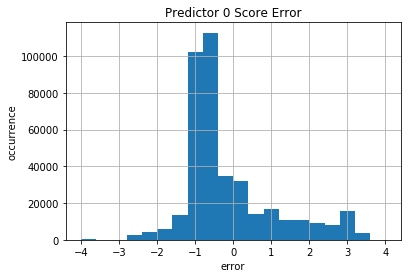

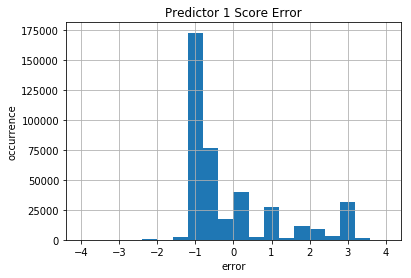

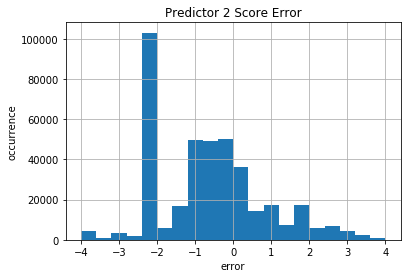

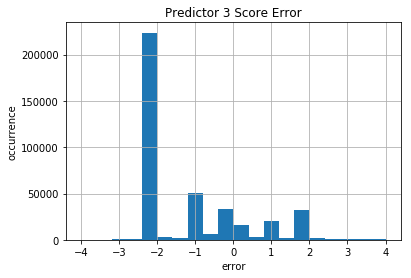

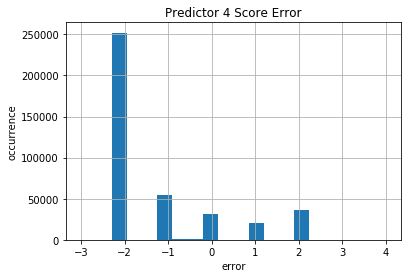

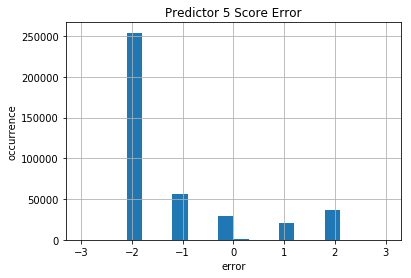

In [13]:
def plot_hists(p):
    for idx in range(6):
        p.figure()
        col = 'Predictor {} Score Error'.format(idx)
        title = 'Predictor {} Score'.format(idx)
        tdd[col].hist(bins=20)
        p.title(col)
        p.xlabel('error')
        p.ylabel('occurrence')
        p.show()

plot_hists(plt)

In [14]:
predictor_stat = pd.DataFrame()
predictor_stat['Name'] = ['Predictor {}'.format(idx) for idx in range(6)]
predictor_stat['Squared Sum'] = [(tdd['Predictor {} Score Error'.format(idx)] ** 2).sum() for idx in range(6)]
predictor_stat['Average Squared Sum'] = predictor_stat['Squared Sum'] / tdd.size

predictor_stat

,Name,Squared Sum,Average Squared Sum
0,Predictor 0,5.873649e+05,0.210871
1,Predictor 1,6.351020e+05,0.228009
2,Predictor 2,9.155433e+05,0.328691
3,Predictor 3,1.166501e+06,0.418788
4,Predictor 4,1.233919e+06,0.442992
5,Predictor 5,1.239123e+06,0.444860
